In [1]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
RANDOM_STATE = 42
shipping = pd.read_csv('data/people.csv')


In [3]:
shipping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87048 entries, 0 to 87047
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   person_id         87048 non-null  int64  
 1   id                87048 non-null  object 
 2   type              87048 non-null  object 
 3   parent            87048 non-null  object 
 4   name              86990 non-null  object 
 5   dob               16573 non-null  object 
 6   age               69755 non-null  float64
 7   place_of_birth    85660 non-null  object 
 8   home_address      13283 non-null  object 
 9   name_of_ship      85022 non-null  object 
 10  ship_port         69996 non-null  object 
 11  date_leaving      70858 non-null  object 
 12  joined_ship_date  78873 non-null  object 
 13  joined_at_port    77337 non-null  object 
 14  capacity          86606 non-null  object 
 15  date_left         66774 non-null  object 
 16  left_port         65534 non-null  object

In [4]:
shipping.head()

,person_id,id,type,parent,name,dob,age,place_of_birth,home_address,name_of_ship,...,date_leaving,joined_ship_date,joined_at_port,capacity,date_left,left_port,cause_of_leaving,sign_with_mark,notes,Unnamed: 20
0,33522,vtls004589021_0_13,sailor,vtls004589021,william cunningham,NaN,19.0,liverpool,NaN,adroit,...,1873-12,1874-01-01,NaN,ordinary seaman,1874-03-19,newcastle,discharged,n,NaN,NaN
1,33523,vtls004589021_0_14,sailor,vtls004589021,evan griffiths,NaN,21.0,portmadoc,NaN,jane owens,...,1874-04,1874-05-15,porthmadog,able seaman,NaN,NaN,remains on board,n,remains on board,NaN
2,33524,vtls004589021_0_12,sailor,vtls004589021,henry evans,NaN,27.0,aberystwyth,NaN,adroit,...,1873-12,1874-01-01,NaN,bosun,NaN,NaN,remains on board,n,remains on board,NaN
3,33525,vtls004589069_0_14,sailor,vtls004589069,david evans,NaN,16.0,aberaeron,NaN,adroit,...,remains,1876-01-01,maryport,ordinary seaman,NaN,NaN,remains on board,n,remains on board,NaN
4,33526,vtls004589021_1_13,sailor,vtls004589021,richard jones,NaN,20.0,aberystwyth,NaN,adroit,...,1874-06,1874-07-01,NaN,ordinary seaman,NaN,NaN,remains on board,n,remains on board,NaN


In [5]:
len(shipping)

87048

In [6]:
shipping.describe(include="all")

,person_id,id,type,parent,name,dob,age,place_of_birth,home_address,name_of_ship,...,date_leaving,joined_ship_date,joined_at_port,capacity,date_left,left_port,cause_of_leaving,sign_with_mark,notes,Unnamed: 20
count,87048.000000,87048,87048,87048,86990,16573,69755.000000,85660,13283,85022,...,70858,78873,77337,86606,66774,65534,82216,85833,9785,31
unique,NaN,87048,1,5659,27769,147,NaN,4697,7179,18241,...,5043,12516,1075,425,11512,1262,125,13,6210,26
top,NaN,vtls004924115_0_12,sailor,vtls004640036,john jones,1866,NaN,aberystwyth,aberystwyth,first ship,...,continued,continued,cardiff,able seaman,remains,liverpool,discharged,n,remains on board,see above note
freq,NaN,1,87048,172,1909,560,NaN,12367,801,1530,...,3212,1449,9807,26270,1206,5608,51949,78821,362,3
mean,77045.500000,NaN,NaN,NaN,NaN,NaN,29.104107,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,25128.737453,NaN,NaN,NaN,NaN,NaN,11.670387,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,33522.000000,NaN,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,55283.750000,NaN,NaN,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,77045.500000,NaN,NaN,NaN,NaN,NaN,26.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,98807.250000,NaN,NaN,NaN,NaN,NaN,36.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
null_columns = shipping.columns[shipping.isnull().any()]
shipping[null_columns].isnull().sum()

name                   58
dob                 70475
age                 17293
place_of_birth       1388
home_address        73765
name_of_ship         2026
ship_port           17052
date_leaving        16190
joined_ship_date     8175
joined_at_port       9711
capacity              442
date_left           20274
left_port           21514
cause_of_leaving     4832
sign_with_mark       1215
notes               77263
Unnamed: 20         87017
dtype: int64

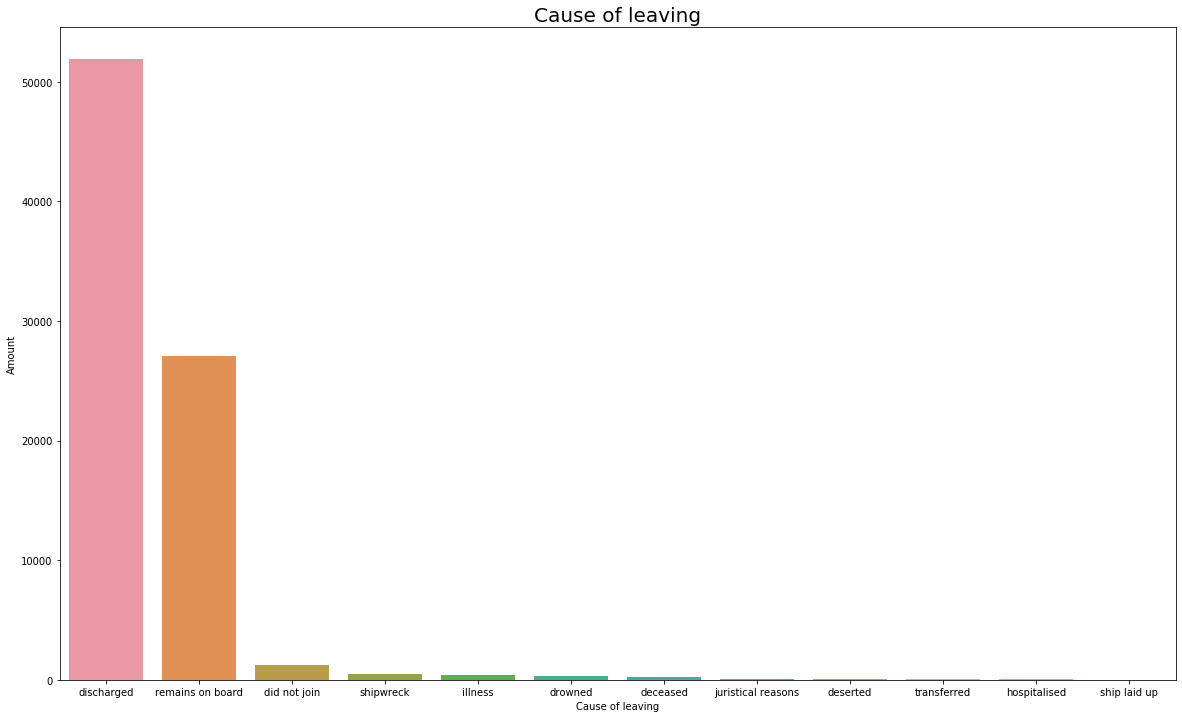

In [8]:
plt.figure(figsize=(20,12))
ax = sns.countplot(x='cause_of_leaving', data=shipping, order=shipping.cause_of_leaving.value_counts().iloc[:12].index)
ax.set(xlabel='Cause of leaving', ylabel='Amount')
plt.title("Cause of leaving", fontsize=20)
plt.show()

In [9]:
pd.options.display.max_rows = 1000
shipping['cause_of_leaving'].value_counts()

discharged                                 51949
remains on board                           27064
did not join                                1206
shipwreck                                    495
illness                                      367
drowned                                      286
deceased                                     194
juristical reasons                            99
deserted                                      89
transferred                                   61
hospitalised                                  36
ship laid up                                  20
n                                             20
abandoned                                     20
vessel sank                                   17
voluntary                                     16
other                                         15
vessel foundered                              15
injured                                       13
crew scuttled ship                            12
end of voyage       

[Text(0, 0.5, 'Relative amount'), Text(0.5, 0, 'Age')]

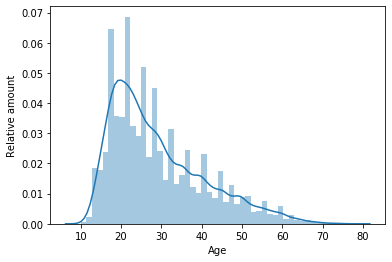

In [10]:
ax = sns.distplot(shipping['age'])
ax.set(xlabel='Age', ylabel='Relative amount')

In [11]:

#df = shipping.dropna(how='all', subset=['date_left', 'joined_ship_date'])
shipping.loc[shipping['date_left'].str.match('^[0-9]{4}-((01|03|05|07|08|10|12)-(0[1-9]|[1-2][0-9]|3[01])|(04|06|09|08|11)-(0[1-9]|[1-2][0-9]|3[0])|02-[0-2][0-9])$')== True]

#print(df['date_left'].value_counts().sort_index())
#dates['joined_ship_date'].value_counts()
#df['joined_ship_date'] = pd.to_datetime(df['joined_ship_date'])
#df['date_left'] = pd.to_datetime(df['date_left'])

,person_id,id,type,parent,name,dob,age,place_of_birth,home_address,name_of_ship,...,date_leaving,joined_ship_date,joined_at_port,capacity,date_left,left_port,cause_of_leaving,sign_with_mark,notes,Unnamed: 20
0,33522,vtls004589021_0_13,sailor,vtls004589021,william cunningham,NaN,19.0,liverpool,NaN,adroit,...,1873-12,1874-01-01,NaN,ordinary seaman,1874-03-19,newcastle,discharged,n,NaN,NaN
9,33531,vtls004589069_1_11,sailor,vtls004589069,david jones,NaN,26.0,aberaeron,NaN,adroit,...,1876,1876-07-01,swansea,master,1876-09-14,runcorn,discharged,n,paid off,NaN
12,33534,vtls004589069_1_13,sailor,vtls004589069,william kyching,NaN,18.0,liverpool,NaN,adroit,...,1876,1876-07-01,swansea,ordinary seaman,1876-09-14,runcorn,discharged,n,paid off,NaN
13,33535,vtls004589069_1_17,sailor,vtls004589069,john jones,NaN,27.0,aberystwyth,NaN,ann davies,...,1876,1876-07-14,runcorn,able seaman,1876-12-18,bangor,discharged,n,paid off,NaN
15,33537,vtls004589069_1_18,sailor,vtls004589069,john davies,NaN,16.0,aberystwyth,NaN,volunteer,...,1876,1876-07-14,runcorn,boy,1876-12-18,bangor,discharged,n,paid off,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87041,120563,vtls004633583_0_17,sailor,vtls004633583,richard jones,1862,NaN,aberystwyth,NaN,leader,...,1886,1886-09-26,swansea,able seaman,1887-10-14,buenos aires,shipwreck,n,NaN,NaN
87042,120564,vtls004633583_0_18,sailor,vtls004633583,adolphus oxly,1869,NaN,barbados,NaN,castle eden,...,1886,1886-09-26,swansea,ordinary seaman,1887-10-14,buenos aires,shipwreck,y,NaN,NaN
87043,120565,vtls004633583_0_19,sailor,vtls004633583,evan evans,1838,NaN,llanon,NaN,swordfish,...,1886,1886-10-07,swansea,mate,1887-10-14,buenos aires,shipwreck,n,NaN,NaN
87044,120566,vtls004633583_0_20,sailor,vtls004633583,michael berichoff,1849,NaN,finland,NaN,foreign,...,1886,1887-06-14,bahia blanca,able seaman,1887-09-23,buenos aires,discharged,n,NaN,NaN


In [12]:
dates = pd.read_csv('data/journey_length.csv')
dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56842 entries, 0 to 56841
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   joined      56842 non-null  object
 1   left        56842 non-null  object
 2   difference  56842 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


[Text(0, 0.5, 'Relative amount'), Text(0.5, 0, 'Length fo')]

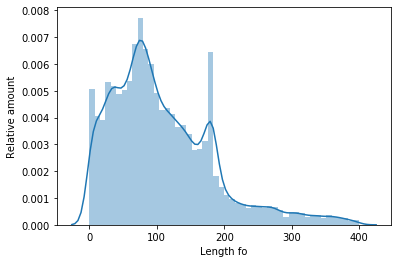

In [13]:
ax = sns.distplot(dates['difference'])
ax.set(xlabel='Length fo', ylabel='Relative amount')

[Text(0, 0.5, 'Relative amount'), Text(0.5, 0, 'Month joined')]

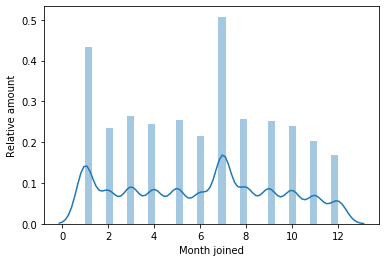

In [14]:
ax = sns.distplot(pd.DatetimeIndex(dates['joined']).month)
ax.set(xlabel='Month joined', ylabel='Relative amount')

[Text(0, 0.5, 'Relative amount'), Text(0.5, 0, 'Month left')]

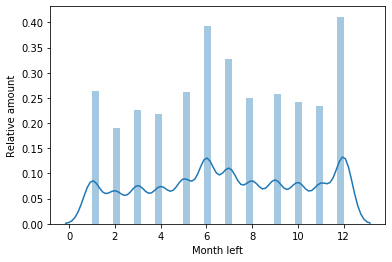

In [15]:
ax = sns.distplot(pd.DatetimeIndex(dates['left']).month)
ax.set(xlabel='Month left', ylabel='Relative amount')

In [16]:
print("Yeet")

Yeet


In [17]:
pd.options.display.max_rows = 1000
dates['difference'].value_counts()

183    967
180    766
74     494
76     485
31     460
77     458
71     457
75     452
82     443
78     441
81     425
66     423
79     417
70     410
84     404
91     400
73     399
67     397
69     389
88     381
87     375
37     373
64     364
181    363
72     357
28     354
35     349
4      343
48     343
62     339
80     339
85     338
94     336
98     336
1      336
93     335
86     333
90     330
61     330
0      328
95     328
42     324
3      322
55     322
30     321
102    321
56     320
59     317
117    314
92     314
65     313
10     313
68     309
83     309
41     307
38     307
36     305
105    305
58     303
114    298
2      296
99     295
96     293
97     292
89     292
122    291
27     290
23     289
43     288
53     288
63     286
51     284
50     280
40     280
60     278
29     278
21     277
49     275
33     272
8      272
34     266
123    265
46     262
24     259
139    258
109    258
47     256
44     256
112    256
57     254
136    251